# Biostat280 HW3
* Author: Shuang Gao
* Date: 2018/05/23

## Q1 - Big $n$ regression

### Q1(1)

Download the flight data from <http://stat-computing.org/dataexpo/2009/the-data.html>. For this exercise, we only need data from years 2003-2008. If you are using Mac or Linux, you can run the following Bash script, which downloads and unzips files for all years.
```bash
# Download flight data by year
for i in {1987..2008}
  do
    echo "$(date) $i Download"
    fnam=$i.csv.bz2
    wget -O ./$fnam http://stat-computing.org/dataexpo/2009/$fnam
    echo "$(date) $i unzip"
    bzip2 -d ./$fnam
  done

# Download airline carrier data
wget -O ./airlines.csv http://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS

# Download airports data
wget -O ./airports.csv https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
```
Find out how many data points in each year.

In [5]:
# change working directory to flight folder 
cd("D:\\UCLA\\quarter3\\BS280\\biostat-m280-2018-spring\\hw3\\flight")

# calculate total data 
count = 0

# print number of data points in each year
for i in 2003:2008
    print(" In year $i, there are ", countlines("$i" * ".csv"), 
        " data points. \n")
    count = count + countlines("$i" * ".csv")
end

print(" There are $count data points in total.")

In year 2003, there are 6488541 data points. 
In year 2004, there are 7129271 data points. 
In year 2005, there are 7140597 data points. 
In year 2006, there are 7141923 data points. 
In year 2007, there are 7453216 data points. 
In year 2008, there are 7009729 data points. 
There are 42363277 data points in total.

### Q1(2) 

We are interested in how the time gain of a flight, defined as `DepDelay - ArrDelay`, depends on the distance traveled (`Distance`), departure delay (`DepDelay`), and carrier (`UniqueCarrier`). 

We want to fit a linear regression `Gain ~ 1 + Distance + DepDelay + UniqueCarrier` using data from 2003-2008. Note `UniqueCarrier` is a factor with 23 levels: "9E", "AA", "AQ", "AS", "B6", "CO", "DH", "DL", "EV", "F9", "FL", "HA", "HP", "MQ", "NW", "OH", "OO", "TZ", "UA", "US", "WN", "XE", and "YV". We use the dummy coding with "9E" as base level.

Will the design matrix (in double precision) fit into the memory of you computer?

* **Solution:**
* There are data points in total. For each row in design matrix, there are 26 predictors. In double precision, the whole design matrix will take up $42363277*26*8/10^9 \approx 8.81$ GB. This data set can not fit into the memory of my computer.

### Q1(3)

Review the [Summary of Linear Regression](http://hua-zhou.github.io/teaching/biostatm280-2018spring/slides/12-linreg/linreg.html) and devise a strategy to solve the linear regression.

Report the estimated regression coefficients $\widehat \beta$, estimated variance $\widehat \sigma^2 = \sum_i (y_i - \widehat y_i)^2 / (n - 1)$, and coefficient standard errors.

Hint: It took my laptop less than 3 minutes to import data and fit linear regression.

In [16]:
# mapping from variable names to X columns
# carrier "9E" is used as base level
const var2col = Dict(
        "Intercept" => 1,
        "Distance" => 2,
        "DepDelay" => 3,
        "AA" => 4,
        "AQ" => 5,
        "AS" => 6,
        "B6" => 7,
        "CO" => 8,
        "DH" => 9,
        "DL" => 10,
        "EV" => 11,
        "F9" => 12,
        "FL" => 13,
        "HA" => 14,
        "HP" => 15,
        "MQ" => 16,
        "NW" => 17,
        "OH" => 18,
        "OO" => 19,
        "TZ" => 20,
        "UA" => 21,
        "US" => 22,
        "WN" => 23,
        "XE" => 24,
        "YV" => 25,
        "Gain" => 26)
# mapping from column to variable names
const col2var = map(reverse, var2col)

# a custom function to generate [X y] from data table
function generate_xy(tbl::NextTable)
    # X matrix
    XY = zeros(length(tbl), 26)
    # intercept term
    @views fill!(XY[:, 1], 1)
    # Distance term
    @views copy!(XY[:, 2], columns(tbl, :Distance))
    # DepDelay term
    @views copy!(XY[:, 3], columns(tbl, :DepDelay))
    # Dummy coding for airline
    @inbounds for i in 1:length(tbl)
        tbl[i][:UniqueCarrier] == "9E" && continue # base level
        XY[i, var2col[tbl[i][:UniqueCarrier]]] = 1
    end
    # last column is response: gain = depdelay - arrdelay
    XY[:, 26] = select(tbl, 
        (:DepDelay, :ArrDelay) => p -> Float64(p.DepDelay - p.ArrDelay))
    # return
    XY
end

generate_xy (generic function with 1 method)

In [3]:
# import data from csv
using JuliaDB

# only need columns: DepDelay, ArrDelay, UniqueCarrier, Distance
table1 = loadtable(
    "2003.csv", 
    datacols = ["DepDelay", "ArrDelay", "UniqueCarrier", "Distance"])

# drop rows with missing values
table1 = dropna(table1);

# only need columns: DepDelay, ArrDelay, UniqueCarrier, Distance
table2 = loadtable(
    "2004.csv", 
    datacols = ["DepDelay", "ArrDelay", "UniqueCarrier", "Distance"])

# drop rows with missing values
table2 = dropna(table2);

# only need columns: DepDelay, ArrDelay, UniqueCarrier, Distance
table3 = loadtable(
    "2005.csv", 
    datacols = ["DepDelay", "ArrDelay", "UniqueCarrier", "Distance"])

# drop rows with missing values
table3 = dropna(table3);

# only need columns: DepDelay, ArrDelay, UniqueCarrier, Distance
table4 = loadtable(
    "2006.csv", 
    datacols = ["DepDelay", "ArrDelay", "UniqueCarrier", "Distance"])

# drop rows with missing values
table4 = dropna(table4);

# only need columns: DepDelay, ArrDelay, UniqueCarrier, Distance
table5 = loadtable(
    "2007.csv", 
    datacols = ["DepDelay", "ArrDelay", "UniqueCarrier", "Distance"])

# drop rows with missing values
table5 = dropna(table5);

# only need columns: DepDelay, ArrDelay, UniqueCarrier, Distance
table6 = loadtable(
    "2008.csv", 
    datacols = ["DepDelay", "ArrDelay", "UniqueCarrier", "Distance"])

# drop rows with missing values
table6 = dropna(table6);


In [40]:
#Pkg.add("SweepOperator")
using SweepOperator

# generate XY for each year
xy1 = generate_xy(table1)
xy2 = generate_xy(table2)
xy3 = generate_xy(table3)
xy4 = generate_xy(table4)
xy5 = generate_xy(table5)
xy6 = generate_xy(table6)

# form the augmented Gram matrix for each year
G1 = xy1' * xy1
G2 = xy2' * xy2
G3 = xy3' * xy3
G4 = xy4' * xy4
G5 = xy5' * xy5
G6 = xy6' * xy6


# use sweep function to do linear regression
G = G1 + G2 + G3 + G4 + G5 + G6
sweep!(G, 1:25);


* The estimated regression coefficients are shown below:

In [25]:
# output regression coefficeints
G[1:25, 26]

25-element Array{Float64,1}:
  1.14033   
  0.00164935
 -0.0118811 
 -1.8723    
 -0.5789    
 -0.938452  
 -1.42247   
 -2.57627   
  1.16808   
 -2.19625   
  1.03932   
 -2.15207   
 -1.35247   
 -1.87248   
 -0.350758  
 -1.46395   
 -3.62506   
 -0.00722279
 -0.40365   
 -3.5774    
 -1.14816   
 -0.883753  
  2.74855   
 -2.56721   
 -0.202211  

In [48]:
# calculate estimated variance
num = size(xy1, 1) + size(xy2, 1) + size(xy3, 1) + size(xy4, 1) +
    size(xy5, 1) + size(xy6, 1)
σ_sq = G[26, 26] / num

204.40310249917593

* The estimated variance $\widehat \sigma^2 = \sum_i (y_i - \widehat y_i)^2 / (n - 1)$ is around 204.

* coefficient standard errors are shown in the vector below:

In [53]:
(diag(-G[1:25, 1:25]) * σ_sq).^(0.5)


25-element Array{Float64,1}:
 0.0202318 
 4.37958e-6
 6.88878e-5
 0.0215571 
 0.0521477 
 0.0250361 
 0.0259154 
 0.0229534 
 0.0266552 
 0.021659  
 0.023012  
 0.0319265 
 0.023868  
 0.0339852 
 0.0276918 
 0.0218055 
 0.0220088 
 0.023446  
 0.0217463 
 0.0375073 
 0.0219444 
 0.0220022 
 0.0209201 
 0.0222383 
 0.0255715 

## Q2 - Google PageRank

We are going to try different numerical methods learnt in class on the [Google PageRank problem](https://en.wikipedia.org/wiki/PageRank).

###  Q2(1)

Let $\mathbf{A} \in \{0,1\}^{n \times n}$ be the connectivity matrix of $n$ web pages with entries
$$
\begin{eqnarray*}
	a_{ij}= \begin{cases}
	1 & \text{if page $i$ links to page $j$} \\
	0 & \text{otherwise}
	\end{cases}.
\end{eqnarray*}
$$
$r_i = \sum_j a_{ij}$ is the out-degree of page $i$. That is $r_i$ is the number of links on page $i$. Imagine a random surfer exploring the space of $n$ pages according to the following rules.  

- From a page $i$ with $r_i>0$
    * with probability $p$, (s)he randomly chooses a link on page $i$ (uniformly) and follows that link to the next page  
    * with probability $1-p$, (s)he randomly chooses one page from the set of all $n$ pages (uniformly) and proceeds to that page  
- From a page $i$ with $r_i=0$ (a dangling page), (s)he randomly chooses one page from the set of all $n$ pages (uniformly) and proceeds to that page  
    
The process defines a Markov chain on the space of $n$ pages. Write the transition matrix $\mathbf{P}$ of the Markov chain as a sparse matrix plus rank 1 matrix.

**Solution:**
* Each element $p_{ij}$ in the transition matrix $P$ represents the probability of transiting from page $i$ to page $j$. There are two posibility for $p_{ij}$: 
    0. If page $i$ has no connection to other pages ($r_i=0$), then transiting to page $j$ will only happen when the next random choice of the $n$ pages to be $j$.
    0. If page $i$ has connection to other pages ($r_i>0$), visitor can transit to page $j$ with the $ij$ connection with probability $p$ or by randomly chosing a next page from all $n$ pages with probability $1-p$.
    
* The transition matrix is shown below:
$$
\mathbf{P}_{ij}=\left\{
    \begin{array}{ll}
    \frac{1-p}{n} + \frac{pa_{ij}}{r_i} \text{ for } r_i>0 \\
    \frac{1}{n} \text{ for } r_i=0
    \end{array}
    \right.
$$
* Matrix $\mathbf{P}$ can be further represented by two parts:
$\mathbf{P} = \mathbf{R}\mathbf{A} + \mathbf{e}\mathbf{v}^T$ where $\mathbf{v}$ is a column vector with n ones,
$$
\mathbf{R}=\left\{
    \begin{array}{ll}
    \frac{p}{r_i} \text{ on the diagonal for } r_i>0 \\
    0 \text{ otherwise. } 
    \end{array}
    \right.
$$


and $\mathbf{e}$ is a column vector with $n$ elements,
$$
\mathbf{e}=\left\{
    \begin{array}{ll}
    \frac{1-p}{n} \text{ for } r_i>0 \\
    \frac{1}{n} \text{ for } r_i=0
    \end{array}
    \right.
$$

* Therefore, matrix $\mathbf{P}$ is composed by a rank 1 matrix, $v$, and a sparse matrix $\mathbf{A}$.


### Q2(2)

 According to standard Markov chain theory, the (random) position of the surfer converges to the stationary distribution $\mathbf{x} = (x_1,\ldots,x_n)^T$ of the Markov chain. $x_i$ has the natural interpretation of the proportion of times the surfer visits page $i$ in the long run. Therefore $\mathbf{x}$ serves as page ranks: a higher $x_i$ means page $i$ is more visited. It is well-known that $\mathbf{x}$ is the left eigenvector corresponding to the top eigenvalue 1 of the transition matrix $\mathbf{P}$. That is $\mathbf{P}^T \mathbf{x} = \mathbf{x}$. Therefore $\mathbf{x}$ can be solved as an eigen-problem. Show that it can also be cast as solving a linear system. Since the row sums of $\mathbf{P}$ are 1, $\mathbf{P}$ is rank deficient. We can replace the first equation by the $\sum_{i=1}^n x_i = 1$.

** Solution: **
$$
\because \mathbf{P}^T \mathbf{x} = \mathbf{x}\\
\therefore (\mathbf{P}^T-\mathbf{I}) \mathbf{x} = \mathbf{0}
$$
* From the above equation, it is shown that the problem can be represented by linear equation. However, because row $i$ in $\mathbf{P}$ represents the probability of transiting from page $i$ to all other pages, the row sum of $\mathbf{P}$ is 1 for all rows. Thus, the row sum of $\mathbf{P}^T-\mathbf{I}$ is 0 for all rows. Therefore, one column of the matrix $\mathbf{P}^T-\mathbf{I}$ can add with all other columns to get an all $0$s column. This results in rank deficiency. 
* Therefore, we can replace the first equation by the $\sum_{i=1}^n x_i = 1$. That is, replacing all the elements in first row of $\mathbf{P}^T-\mathbf{I}$ by $1$ and also replace the first element of right hand side vector by $1$.

### Q2(3)

Download the [`ucla.zip`](http://hua-zhou.github.io/teaching/biostatm280-2018spring/hw/hw3/ucla.zip) package from course webpage. Unzip the package, which contains two files `U.txt` and `A.txt`. `U.txt` lists the 500 URL names. `A.txt` is the $500 \times 500$ connectivity matrix. Read data into Julia. Compute summary statistics:
* number of pages
* number of edges
* number of dangling nodes (pages with no out links)
* which page has max in-degree?
* which page has max out-degree?
* visualize the sparsity pattern of $\mathbf{A}$

In [191]:
# change working directory to UCLA folder 
cd("D:\\UCLA\\quarter3\\BS280\\biostat-m280-2018-spring\\hw3\\ucla")

# readin data A and U
A = readdlm("A.txt", ',')
U = readdlm("U.txt", ',');

* number of pages

In [60]:
print("The number of pages in the study is ", size(U, 1), ".")

The number of pages in the study is 500.

* number of edges

In [63]:
print("The number of edges in the study is ", nnz(sparse(A)), ".")

The number of edges in the study is 11158.

* number of dangling nodes(pages with no out links)

In [75]:
rowsum = sum(sparse(A), 2);

print("The number of dangling nodes is ", 
    500 - size(rowsum[rowsum .> 0], 1), ".")

The number of dangling nodes is 96.

* Which page has max in-degree?


In [80]:
colsum = sum(sparse(A), 1)

print("The page ", U[findmax(colsum)[2]], " has max in-degree ", 
    findmax(colsum)[1], ".")

The page http://www.ucla.edu has max in-degree 171.0.

* Which page has max out-degree?

In [81]:
print("The page ", U[findmax(rowsum)[2]], " has max in-degree ", 
    findmax(rowsum)[1], ".")

The page http://giveto.ucla.edu has max in-degree 88.0.

* Visualize the sparsity pattern of A

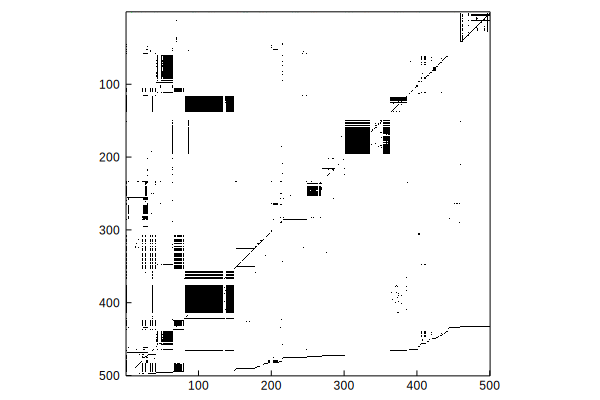

In [3]:
#Pkg.add("Plots")
using Plots

spy(A)

### Q2(4)

Set the _teleportation_ parameter at $p = 0.85$. Try the following methods to solve for $\mathbf{x}$ using the `ucla.zip` data.

0. A dense linear system solver such as LU decomposition.  
0. A simple iterative linear system solver such as Jacobi or Gauss-Seidel.   
0. A dense eigen-solver.  
0. A simple iterative eigen-solver such as the power method.  

For iterative methods, you can use the [`IterativeSolvers.jl`](https://github.com/JuliaMath/IterativeSolvers.jl) package. Make sure to utilize the special structure of $\mathbf{P}$ (sparse + rank 1) to speed up the matrix-vector multiplication.

* **LU decomposition**

In [175]:
# teleportation parameter 
p = 0.85

# row sum of connectivity matrix A
r = sum(A, 2);

# number of pages
n = 500

# initialize the transition matrix 
P = zeros(500, 500)

# input transition probability from page i to page j
for j in 1:500
    for i in 1:500
        if r[i] > 0
            P[i, j] = p * A[i, j] / r[i] + (1 - p) / n
        else
            P[i, j] = 1 / n
        end
    end
end


# adjustment for M = P'-I and b to avoid rank deficiency
Q = P' - I
Q[1, :] = 1.0

b1 = zeros(n, 1)
b1[1, 1] = 1.0

# LU decomposition for M
Qlu = lufact(Q, Val{true})

# get the result for x 
Qlu \ b1


500×1 Array{Float64,2}:
 0.0115263 
 0.00118521
 0.00368196
 0.00361842
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00137118
 0.00133263
 ⋮         
 0.00136037
 0.00136037
 0.00129072
 0.00337188
 0.00215239
 0.00136037
 0.00136037
 0.00750605
 0.00136037
 0.00136037
 0.00136037
 0.00107129

* **Jacobi Method**

 * Decomposition of  $\mathbf{P}$:
$\mathbf{P} = \mathbf{R}\mathbf{A} + \mathbf{e}\mathbf{v}^T$ where $\mathbf{v}$ is a column vector with n ones,
$$
\mathbf{R}=\left\{
    \begin{array}{ll}
    \frac{p}{r_i} \text{ on the diagonal for } r_i>0 \\
    0 \text{ otherwise. } 
    \end{array}
    \right.
$$


and $\mathbf{e}$ is a column vector with $n$ elements,
$$
\mathbf{e}=\left\{
    \begin{array}{ll}
    \frac{1-p}{n} \text{ for } r_i>0 \\
    \frac{1}{n} \text{ for } r_i=0
    \end{array}
    \right.
$$

* In this question, we want to solve $(P^T-I)x=0$ with iterative method Jacobi method.
* First, split $P^T-I= L+D+U$, where $D$ is the diaganol of $P^T-I$, $U$ is the upper part without the diagonal of $P^T-I$, and $L$ is the lower part without diagonal of $P^T-I$.
* Jacobi iteration can be written as 
$$
\begin{align}
x^{(t+1)} 
&= -D^{-1}(P^T-I)x^{(t)}+x^{(t)}+D^{-1}b\\
&= -D^{-1}((R*A+ev^T)^T-I)x^{(t)}+D^{-1}b+x^{(t)}\\
&= -D^{-1}((A^TR^T+ve^T-I)x^{(t)}+D^{-1}b+x^{(t)}\\
&= -D^{-1}A^TR^Tx^{(t)}-D^{-1}ve^Tx^{(t)}+D^{-1}Ix^{(t)}+D^{-1}b+x^{(t)}\\
&= -D^{-1}A^TR^Tx^{(t)}-D^{-1}ve^Tx^{(t)}+D^{-1}x^{(t)}+x^{(t)} \space with\space b = 0
\end{align}
$$


In [197]:
# P = RA + ev'
p = 0.85
n = 500
rowsum = sum(A, 2)

# intialization
v = ones(n)
R_diag = zeros(n, 1)
e = zeros(n, 1)

#input e and R_diag
for i in 1:n
    if rowsum[i] > 0
        R_diag[i] = p / rowsum[i]
        e[i] = (1 - p) / n
    else
        R_diag[i] = 0.0   
        e[i] = 1 / n
    end
end

# initial guess and initialize x
x_old = ones(n, 1) 
x_new = zeros(n, 1)

# D inverse
D_inv = inv(Diagonal(P' - I))

for i in 1:1000
    
    x_new .= A_mul_B!(x_new, (-D_inv * A'), (R_diag .* x_old)) - 
        diag(D_inv) .* v * dot(e, x_old) + diag(D_inv) .* x_old + x_old 

    if vecnorm(x_new - x_old) < 1e-5
        break
    end
    x_old = copy(x_new)
end

x_new / sum(x_new)


500×1 Array{Float64,2}:
 0.0115263 
 0.00118521
 0.00368196
 0.00361842
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00137118
 0.00133263
 ⋮         
 0.00136037
 0.00136037
 0.00129072
 0.00337188
 0.00215239
 0.00136037
 0.00136037
 0.00750605
 0.00136037
 0.00136037
 0.00136037
 0.00107129

* **A dense eigen-solver**

* Solve for $P^Tx = x$ is same as solve for $P^Tx = \lambda x$ with $\lambda = 1$. Therefore, we are looking for the eigenvector corresponding to $\lambda = 1$ and standardize the eigenvector by making the sum of each element to one (each element in x represents the proportion of time visitor visit each page).

In [198]:
# eigen factor the matrix P'
P_eigen = eigfact(P')

# check the lambda = 1
P_eigen[:values]

# find the corresponding eigenvector
x_3 = P_eigen[:vectors][:, 1]

# normalize the vector
x_3 = x_3 / sum(x_3)

# converet the complex array to float64 array
Float64.(x_3)


500-element Array{Float64,1}:
 0.0115263 
 0.00118521
 0.00368196
 0.00361842
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00118521
 0.00137118
 0.00133263
 ⋮         
 0.00136037
 0.00136037
 0.00129072
 0.00337188
 0.00215239
 0.00136037
 0.00136037
 0.00750605
 0.00136037
 0.00136037
 0.00136037
 0.00107129

* **Power Method**

* From the iterative method, the update is followed by the following forumula,$$X^{(t)}\leftarrow \frac{1}{\|Ax^{(t-1)}\|_2}Ax^{(t-1)}$$

In [199]:
# initial guess
x_old = 1 /  n * ones(n)

# tolerence
tol = 1e-5

# initilization 
x_new = zeros(n)

for i in 1:1000
    x_new = 1 / vecnorm(P' * x_old) * P' * x_old
    
    if vecnorm(x_new - x_old) < tol
        break
    end
    
    x_old = copy(x_new)
end

x_new = x_new / sum(x_new)

500-element Array{Float64,1}:
 0.0115264 
 0.00118522
 0.00368199
 0.00361845
 0.00118522
 0.00118522
 0.00118522
 0.00118522
 0.00118522
 0.00118522
 0.00118522
 0.00137119
 0.00133264
 ⋮         
 0.00136038
 0.00136038
 0.00129073
 0.0033719 
 0.00215241
 0.00136038
 0.00136038
 0.00750612
 0.00136038
 0.00136038
 0.00136038
 0.0010713 

### Q2(5)

List the top 20 ranked URLs you found.

In [200]:
# fint the top 20 URL index

rank = sortperm(x_new, rev = true)[1:20]

# find the matching URL in U
U[rank, 1]


20-element Array{Any,1}:
 "http://hammer.ucla.edu"                                                                
 "http://schema.org"                                                                     
 "http://www"                                                                            
 "http://giveto.ucla.edu/comments/feed"                                                  
 "http://browsehappy.com"                                                                
 "http://schema.org/Text"                                                                
 "http://www.ucla.edu"                                                                   
 "http://www.directory.ucla.edu"                                                         
 "http://www.universityofcalifornia.edu"                                                 
 "http://schema.org/CreativeWork"                                                        
 "http://www.registrar.ucla.edu/calendar"                                  

### Q2(6)

As of Monday May 11 2018, there are at least 1.83 billion indexed webpages on internet according to <http://www.worldwidewebsize.com/>. Explain whether each of these methods works for the PageRank problem at this scale.

**Solution:**
* Both LU decomposition and dense eigen-solver are direct methods, which are only good for small to moderate matrices. Take LU decomposition as an example, it takes $\frac{2}{3}n^3$ flops to solve for a linear system. When n is at least 1.83 billion, it takes forever to solve for the linear system related to huge amount of webpages. Therefore, the direct methods will not solve for the PageRank problem at large scale.
* Both Jacobi method and power method are iterative methods, which are good for large scale problem. In Jacobi method, one round costs $2n^2$ flops, which is much better than direct methods. In the PageRank problem, the matrix $P$ is decompsed to sparse and low rank matrices, which even further optimize the problem. In power method, each iteration costs $O(n)$ flops, which is also great for large scale problem.
* Also, if the iterative methods start with a better initial guess, they can probably get closer to the true solution with fast convergence. In the PageRank solution, this means the previous data can be used as an initial guess for solving later problems. 